In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preparing Data

In [3]:
# read data
data = pd.read_excel(r'/content/drive/MyDrive/TA (1)/Processing Data/Data/raw data/data_after_cleansing.xlsx',sheet_name="Belawan")
data

,Date,Hours,Hs [m],Angin [m/s]
0,1999-07-10 15:00:00,1,0.750,2.726197
1,1999-07-10 16:00:00,2,0.750,2.608670
2,1999-07-10 17:00:00,3,0.750,3.021065
3,1999-07-10 18:00:00,4,0.688,3.464277
4,1999-07-10 19:00:00,5,0.688,3.940771
...,...,...,...,...
437,1999-07-28 20:00:00,438,0.656,2.244146
438,1999-07-28 21:00:00,439,0.500,1.601026
439,1999-07-28 22:00:00,440,0.500,1.483258
440,1999-07-28 23:00:00,441,0.500,1.312014


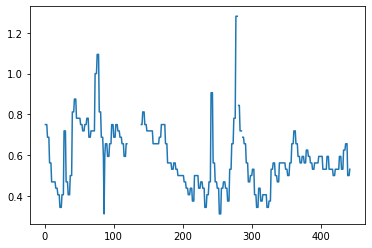

In [4]:
# plotting raw data
plt.plot(data['Hours'],data['Hs [m]'])
plt.show()

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Hs [m]'],
                    mode='lines')
)

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [5]:
import copy
data_raw = copy.deepcopy(data)

### handling outliers

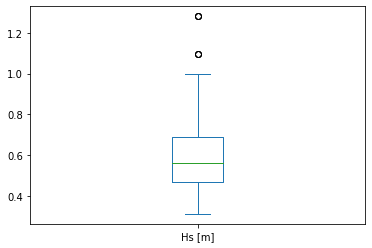

In [ ]:
data['Hs [m]'].plot(kind='box', sharex=False, sharey=False)
plt.show()

In [ ]:
# calculate q1, q3, iqr 
q1 = data['Hs [m]'].quantile(0.25)
q3 = data['Hs [m]'].quantile(0.75)
iqr = q3 - q1

In [ ]:
data['Hs [m]'].loc[(data['Hs [m]']> q3+(1.5*iqr)) & (data['Hs [m]']<= q3+(3*iqr)) ]

75     1.094
76     1.094
77     1.094
276    1.281
277    1.281
278    1.281
Name: Hs [m], dtype: float64

In [ ]:
# outlier atas
data['Hs [m]'].loc[(data['Hs [m]']> q3+(1.5*iqr)) & (data['Hs [m]']<= q3+(3*iqr)) ] = np.nan

#outlier bawah
data['Hs [m]'].loc[(data['Hs [m]']< q1-(1.5*iqr)) & (data['Hs [m]']>= q1-(3*iqr)) ] = np.nan

# nilai ekstrim bawah
data['Hs [m]'].loc[data['Hs [m]']> q3 + (3*iqr) ] = np.nan

# nilai ekstrim atas
data['Hs [m]'].loc[data['Hs [m]']< q1 - (3*iqr) ] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data.head()

,Date,Hours,Hs [m],Angin [m/s]
0,1999-07-10 15:00:00,1,0.750,2.726197
1,1999-07-10 16:00:00,2,0.750,2.608670
2,1999-07-10 17:00:00,3,0.750,3.021065
3,1999-07-10 18:00:00,4,0.688,3.464277
4,1999-07-10 19:00:00,5,0.688,3.940771


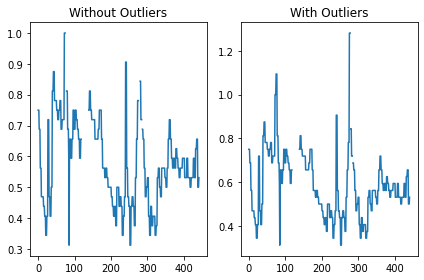

In [ ]:
plt.subplot(121)
plt.plot(data['Hs [m]'])
plt.title('Without Outliers')

plt.subplot(122)
plt.plot(data_raw['Hs [m]'])
plt.title('With Outliers')

plt.tight_layout()

### Interpolation

In [7]:
# import library
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [8]:
# define other dataframe for interpolate 
data2 = copy.deepcopy(data)
data3 = copy.deepcopy(data)
data4 = copy.deepcopy(data)

In [9]:
# drop NaN value in dataframe data
data = data.dropna()

In [10]:
# cubic interpolation
y_fc=interp1d(data['Hours'],data['Hs [m]'], kind='cubic')

In [11]:
# quadratic interpolation
y_fq=interp1d(data['Hours'],data['Hs [m]'], kind='quadratic')

In [12]:
y_fc=CubicSpline(data['Hours'],data['Hs [m]'],extrapolate=True)

In [13]:
# linear interpolation
y_fl=interp1d(data['Hours'],data['Hs [m]'], kind='linear')

In [14]:
# interpolate using function we define before
import math

for i in data2['Hours'] :
  if math.isnan(data2['Hs [m]'][i-1])== True:
    data2['Hs [m]'][i-1] = y_fc(i)
    data3['Hs [m]'][i-1] = y_fq(i)
    data4['Hs [m]'][i-1] = y_fl(i)
  else:
    pass
#data.loc[data['Hs [m]'].isna()]

<ipython-input-14-86623d2f7eed>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-86623d2f7eed>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-86623d2f7eed>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



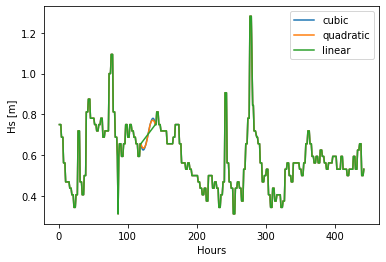

In [15]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
plt.plot(data3['Hours'],data3['Hs [m]'], label ='quadratic')
plt.plot(data4['Hours'],data4['Hs [m]'], label ='linear')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

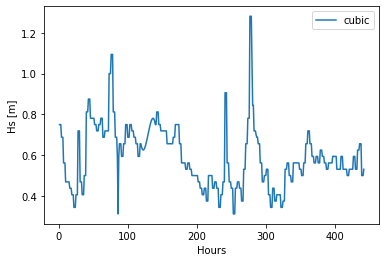

In [16]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data2['Date'], y=data2['Hs [m]'], name="Hs"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data2['Date'], y=data2['Angin [m/s]'], name="Wind"),
    secondary_y=True,
)

# Add figure title
# fig.update_layout(
#     title_text="Double Y Axis Example"
# )

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b><i>Hs</i> [m]</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>Wind [m/s]</b> ", secondary_y=True)

fig.update_layout( font_size = 14,
                    legend=dict(
                        yanchor="top",
                        y=0.99,
                        xanchor="left",
                        x=0.01,
                        font_size=10)
                    
                    ,
                    yaxis_range=[0,1.8])
fig.show()

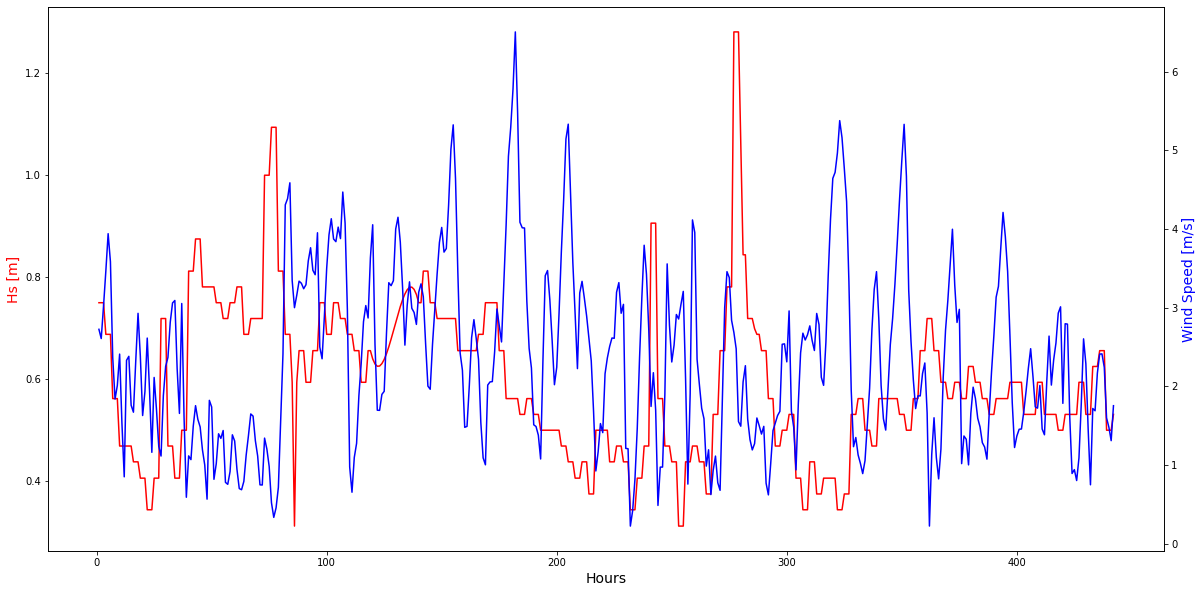

In [18]:
# plotting wind and wave
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(data2['Hours'],
        data2['Hs [m]'],
        color="red", 
        )
# set x-axis label
ax.set_xlabel("Hours", fontsize = 14)
# set y-axis label
ax.set_ylabel("Hs [m]",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data2['Hours'],
        data2['Angin [m/s]'],color="blue")
ax2.set_ylabel("Wind Speed [m/s]",color="blue",fontsize=14)
plt.show()

karena data tidak berdistribusi normal -> ada skew nya (positif) makanya buat scaling data pake -> Normalize Data

In [19]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data2['Hs [m]'],data2['Angin [m/s]'])
corr

-0.1422354034891174

### splitting data

In [ ]:
hs = data2['Hs [m]']

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 2
X1, y1 = df_to_X_y(hs, WINDOW_SIZE)
X1.shape, y1.shape

((440, 2, 1), (440,))

In [ ]:
X_train1, y_train1 = X1[:round(len(X1)*0.7)], y1[:round(len(y1)*0.7)]
X_val1, y_val1 = X1[round(len(X1)*0.7):round(len(X1)*0.8)], y1[round(len(y1)*0.7):round(len(y1)*0.8)]
X_test1, y_test1 = X1[round(len(X1)*0.8):], y1[round(len(X1)*0.8):]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((308, 2, 1), (308,), (44, 2, 1), (44,), (88, 2, 1), (88,))

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((2, 1)))
model1.add(LSTM(200, activation='relu'))
model1.add(RepeatVector(1))
model1.add(LSTM(200, activation='relu', return_sequences=True))
model1.add(TimeDistributed(Dense(100, activation='relu')))
model1.add(TimeDistributed(Dense(1)))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               161600    
                                                                 
 repeat_vector (RepeatVector  (None, 1, 200)           0         
 )                                                               
                                                                 
 lstm_3 (LSTM)               (None, 1, 200)            320800    
                                                                 
 time_distributed (TimeDistr  (None, 1, 100)           20100     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 1)             101       
 tributed)                                                       
                                                      

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.3892 - root_mean_squared_error: 0.6238

10/10 [==============================] - 11s 873ms/step - loss: 0.3975 - root_mean_squared_error: 0.6281 - val_loss: 0.2214 - val_root_mean_squared_error: 0.4580
Epoch 2/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.3867 - root_mean_squared_error: 0.6219

10/10 [==============================] - 5s 519ms/step - loss: 0.3855 - root_mean_squared_error: 0.6212 - val_loss: 0.2133 - val_root_mean_squared_error: 0.4495
Epoch 3/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.3710 - root_mean_squared_error: 0.6091

10/10 [==============================] - 4s 425ms/step - loss: 0.3737 - root_mean_squared_error: 0.6105 - val_loss: 0.2046 - val_root_mean_squared_error: 0.4401
Epoch 4/100
 7/10 [====================>.........] - ETA: 0s - loss: 0.3667 - root_mean_squared_error: 0.6055

10/10 [==============================] - 6s 634ms/step - loss: 0.3611 - root_mean_squared_error: 0.6008 - val_loss: 0.1952 - val_root_mean_squared_error: 0.4297
Epoch 5/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.3439 - root_mean_squared_error: 0.5864

10/10 [==============================] - 4s 433ms/step - loss: 0.3472 - root_mean_squared_error: 0.5882 - val_loss: 0.1849 - val_root_mean_squared_error: 0.4180
Epoch 6/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.3358 - root_mean_squared_error: 0.5794

10/10 [==============================] - 4s 479ms/step - loss: 0.3317 - root_mean_squared_error: 0.5772 - val_loss: 0.1734 - val_root_mean_squared_error: 0.4046
Epoch 7/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.3178 - root_mean_squared_error: 0.5637

10/10 [==============================] - 5s 571ms/step - loss: 0.3142 - root_mean_squared_error: 0.5617 - val_loss: 0.1606 - val_root_mean_squared_error: 0.3891
Epoch 8/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.2955 - root_mean_squared_error: 0.5436

10/10 [==============================] - 4s 486ms/step - loss: 0.2942 - root_mean_squared_error: 0.5428 - val_loss: 0.1462 - val_root_mean_squared_error: 0.3711
Epoch 9/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.2685 - root_mean_squared_error: 0.5182

10/10 [==============================] - 4s 428ms/step - loss: 0.2718 - root_mean_squared_error: 0.5212 - val_loss: 0.1301 - val_root_mean_squared_error: 0.3497
Epoch 10/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.2428 - root_mean_squared_error: 0.4927

10/10 [==============================] - 6s 620ms/step - loss: 0.2460 - root_mean_squared_error: 0.4948 - val_loss: 0.1122 - val_root_mean_squared_error: 0.3244
Epoch 11/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.2184 - root_mean_squared_error: 0.4674

10/10 [==============================] - 4s 420ms/step - loss: 0.2175 - root_mean_squared_error: 0.4668 - val_loss: 0.0928 - val_root_mean_squared_error: 0.2948
Epoch 12/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.1871 - root_mean_squared_error: 0.4326

10/10 [==============================] - 4s 484ms/step - loss: 0.1864 - root_mean_squared_error: 0.4314 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2603
Epoch 13/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.1554 - root_mean_squared_error: 0.3942

10/10 [==============================] - 5s 528ms/step - loss: 0.1534 - root_mean_squared_error: 0.3926 - val_loss: 0.0524 - val_root_mean_squared_error: 0.2208
Epoch 14/100
10/10 [==============================] - ETA: 0s - loss: 0.1207 - root_mean_squared_error: 0.3489

10/10 [==============================] - 5s 529ms/step - loss: 0.1207 - root_mean_squared_error: 0.3489 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1773
Epoch 15/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.0970 - root_mean_squared_error: 0.3115

10/10 [==============================] - 4s 431ms/step - loss: 0.0900 - root_mean_squared_error: 0.3011 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1330
Epoch 16/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.0669 - root_mean_squared_error: 0.2587

10/10 [==============================] - 5s 587ms/step - loss: 0.0652 - root_mean_squared_error: 0.2565 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0956
Epoch 17/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.0500 - root_mean_squared_error: 0.2236

10/10 [==============================] - 4s 457ms/step - loss: 0.0477 - root_mean_squared_error: 0.2183 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0786
Epoch 18/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0394 - root_mean_squared_error: 0.1991 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0844
Epoch 19/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0372 - root_mean_squared_error: 0.1923 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0946
Epoch 20/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0362 - root_mean_squared_error: 0.1910 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0982
Epoch 21/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0371 - root_mean_squared_error: 0.1938 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0971
Epoch 22/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0360 - root_mean_squared_error: 0.1903 - val_loss: 0.0081 - val_root_m

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Univariate':train_predictions, 'Actuals':y_train1})
train_results

10/10 [==============================] - 0s 9ms/step


,Univariate,Actuals
0,0.590098,0.750
1,0.590098,0.688
2,0.577649,0.688
3,0.560606,0.688
4,0.560606,0.562
...,...,...
303,0.432357,0.406
304,0.432357,0.344
305,0.420965,0.344
306,0.405513,0.344


In [ ]:
train_results['Date'] = data2['Date'].iloc[:round(len(X1)*0.7)]
train_results.head()

,Univariate,Actuals,Date
0,0.590098,0.750,1999-07-10 15:00:00
1,0.590098,0.688,1999-07-10 16:00:00
2,0.577649,0.688,1999-07-10 17:00:00
3,0.560606,0.688,1999-07-10 18:00:00
4,0.560606,0.562,1999-07-10 19:00:00


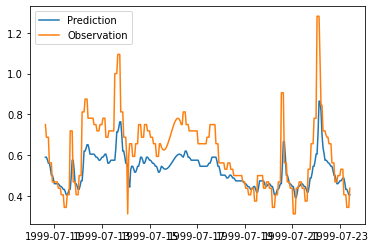

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Date'],train_results['Univariate'], label ='Prediction')
plt.plot(train_results['Date'],train_results['Actuals'], label='Observation')
plt.legend(loc='best')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Training'))
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Univariate':val_predictions, 'Actuals':y_val1})
val_results.head()

2/2 [==============================] - 0s 10ms/step


,Univariate,Actuals
0,0.422650,0.438
1,0.446401,0.438
2,0.446401,0.375
3,0.434723,0.375
4,0.418875,0.375


In [ ]:
val_results['Date'] = data2['Date'].iloc[round(len(X1)*0.7):round(len(X1)*0.8)].values
val_results.head()

,Univariate,Actuals,Date
0,0.422650,0.438,1999-07-23 11:00:00
1,0.446401,0.438,1999-07-23 12:00:00
2,0.446401,0.375,1999-07-23 13:00:00
3,0.434723,0.375,1999-07-23 14:00:00
4,0.418875,0.375,1999-07-23 15:00:00


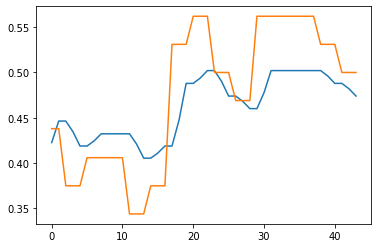

In [ ]:
plt.plot(val_results['Univariate'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Validation'))
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Univariate':test_predictions, 'Actuals':y_test1})
test_results.head()

3/3 [==============================] - 0s 10ms/step


,Univariate,Actuals
0,0.473983,0.562
1,0.485760,0.562
2,0.502064,0.562
3,0.502064,0.656
4,0.520257,0.656


In [ ]:
test_results['Date'] = data2['Date'].iloc[round(len(X1)*0.8):round(len(X1))].values
test_results.head()

,Univariate,Actuals,Date
0,0.473983,0.562,1999-07-25 07:00:00
1,0.485760,0.562,1999-07-25 08:00:00
2,0.502064,0.562,1999-07-25 09:00:00
3,0.502064,0.656,1999-07-25 10:00:00
4,0.520257,0.656,1999-07-25 11:00:00


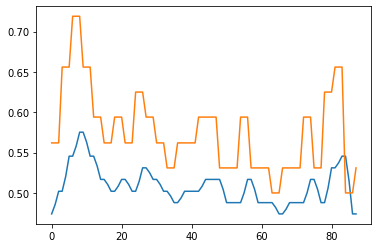

In [ ]:
plt.plot(test_results['Univariate'])
plt.plot(test_results['Actuals'])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Testing'))
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Univariate'])
RMSE = math.sqrt(MSE)
RMSE

0.0775244362255215

### verif


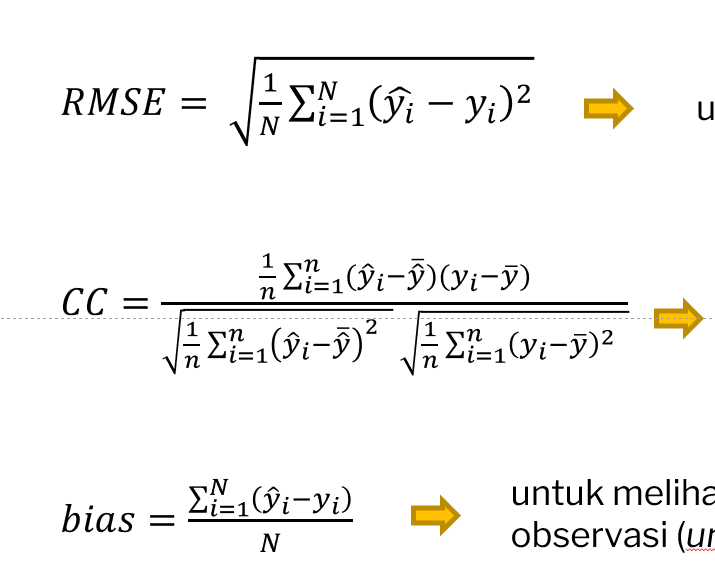

In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Univariate'])
RMSE = math.sqrt(MSE)
RMSE

0.0775244362255215

In [ ]:
# coefficiect correlation 
mean_pred = test_results['Univariate'].mean()
mean_obv = test_results['Actuals'].mean()
atas = 0
a_sum = 0
b_sum = 0
for i in range(len(test_results['Actuals'])):
  a = test_results['Univariate'][i] - mean_pred
  b = test_results['Actuals'][i] - mean_obv
  c = a*b
  atas +=c
  a_sqr = a**2
  b_sqr = b**2
  a_sum += a_sqr
  b_sum += b_sqr
 
print(atas, a_sum, b_sum)
konst = 1/len(test_results['Actuals'])
cc = konst* atas / ((konst*a_sum)**0.5) * ((konst*b_sum)**0.5)
cc

0.07264527746899557 0.044677849493225175 0.22896436363636363


0.0018687987331512939

In [ ]:
konst

0.011363636363636364

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(test_results['Actuals'],test_results['Univariate'])
corr

0.7182527704555622

In [ ]:
# bias 
gap_sum = 0
for j in range(len(test_results['Actuals'])):
  gap = test_results['Univariate'][j] - test_results['Actuals'][j]
  gap_sum += gap

bias = gap_sum/len(test_results['Actuals'])
bias

-0.06746478075059975

In [ ]:
train_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_train_lstm_belawan.csv')
val_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_val_lstm_belawan.csv')
test_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_test_lstm_belawan.csv')